## Kernel SVM classifier
### Advantages: High performance on nonlinear problems, not biased by outliers, not sensitive to overfitting
### Disadvantages: Not the best choice for large number of features, more complex

In [1]:
# Load in the data
import os
import pandas as pd

DATASET_PATH = "datasets/"
DATASET_NAME = "Social_Network_Ads.csv"
DATASET_URL = DATASET_PATH + DATASET_NAME

def fetch_data(dataset_url=DATASET_URL, dataset_path=DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)

dataset = fetch_data()

def load_data(dataset_path=DATASET_PATH, dataset_name=DATASET_NAME):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)

dataset = load_data()

In [2]:
#Create training and test sets
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [3]:
# Scale features
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
# Create Kernel SVM Classifier
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', random_state=0)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

In [5]:
#Check out the performance
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

cf_mat= confusion_matrix(y_test, y_pred)
tp = cf_mat[0,0]
tn = cf_mat[1,1]
fp = cf_mat[1,0]
fn = cf_mat[0,1]
total = tp+tn+fp+fn

#I'm cheating b/c test set is 100 data pts.
print("Precision: %.2f" % precision_score(y_test, y_pred))
print('Recall: %.2f' % recall_score(y_test, y_pred))
print('F1 Score: %.2f' % f1_score(y_test, y_pred))
print("Percentage True Positive: %.2f" % ((tp/total)*100))
print("Percentage True Negative: %.2f" % ((tn/total)*100))
confusion_matrix(y_test, y_pred)

Precision: 0.88
Recall: 0.91
F1 Score: 0.89
Percentage True Positive: 64.00
Percentage True Negative: 29.00


array([[64,  4],
       [ 3, 29]])

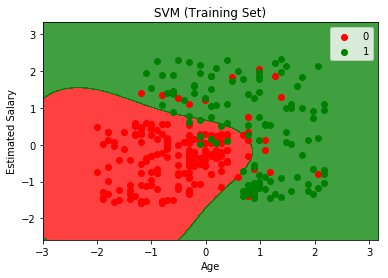

In [6]:
#Visualizing results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_classification_performance(X_set, y_set, classifier, title):
        X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop= X_set[:, 0].max() + 1, step = 0.01),
                  np.arange(start = X_set[:, 1].min() -1, stop= X_set[:, 1].max() + 1, step = 0.01))
        plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
        plt.xlim(X1.min(), X1.max())
        plt.ylim(X2.min(), X2.max())
        for i, j in enumerate(np.unique(y_set)):
            plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                        c = ListedColormap(('red', 'green'))(i), label = j)
            plt.title(title)
            plt.xlabel('Age')
            plt.ylabel('Estimated Salary')
            plt.legend()
            
plot_classification_performance(X_train, y_train, svm_clf, 'SVM (Training Set)')
plt.show()

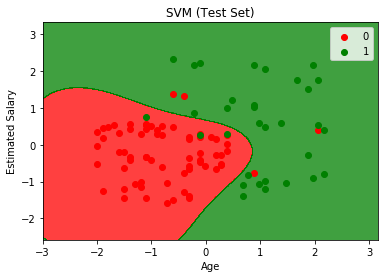

In [7]:
plot_classification_performance(X_test, y_test, svm_clf, 'SVM (Test Set)')
plt.show()